# 实验——逻辑回归

## Step1 任务分析

### question：应用逻辑回归算法识别乳腺癌。
乳腺癌是一种发于腺上皮组织的恶性肿瘤，居女性恶性肿瘤的第1位。原位的乳腺癌并不致命，但随着癌变进一步发展，形成的乳腺癌细胞连接较为松散，容易脱落，之后便随着血液扩散到全身危及生命. 如果有能根据某些特征识别出乳腺癌以及乳腺癌类型的方法，那么将极大地帮助对疾病进行早发现以及针对性治疗. （数据集为sklearn库自带乳腺癌数据集，使用load_breast_cancer()函数可加载该数据集）

## Step2 数据预处理

In [1]:
#Step1 查看数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets  # 导入库
dataset = datasets.load_breast_cancer()  # 导入乳腺癌数据

In [2]:
#character
train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#label
test = pd.DataFrame(dataset.target)
test = test.rename(columns={0:'target'})
# 查看训练集,测试集数据维度
print(f'训练集维度：{train.shape}')
print(f'测试集维度：{test.shape}')

训练集维度：(569, 30)
测试集维度：(569, 1)


In [3]:
#显示所有特征列
pd.set_option('display.max_columns',None)
#查看训练集数据
train.head(3).append(train.tail(3))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.4280,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
#查看测试集数据
test.head(3).append(test.tail(3))

,target
0,0
1,0
2,0
566,0
567,0
568,1


In [5]:
#查看label分布
test['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [6]:
#查看数据类型
print(train.info())
print('-------------------------------------')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

* 特征列数据无空值，数据类型均为float64
* 标签列数据无空值，数据类型为int64

In [7]:
#统计学角度观察数据
train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* 各特征列数量均为569，无空值、缺失值
* 通过观察min，25%，50%，75%，max，发现数据分布均匀，不需要进行纠偏处理

### 建模调参

#### 一、使用自定义函数

In [ ]:
def sigmoid(z):
return 1 / (1 + np.exp(-z))

In [ ]:
def model(X, theta):
return sigmoid(np.dot(X, theta.T))

In [ ]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
return np.sum(left - right) / (len(X))

In [ ]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)- y).ravel()
    for j in range(len(theta.ravel())): #for each parmeter
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
    
return grad

* 逻辑斯蒂回归是二分类方法,但sklearn中的逻辑斯蒂回归函数实现了多分类算法。
* 逻辑斯蒂回归本质上也是一种线性分类器，就是用线性函数曲线将超平面分成两部分。和上边讲的内容一样，通过增加多项式特征也可以实现非线性分类。
* from sklearn.linear_model import LogisticRegression 这个分类器可以设置正则化功能,但只能做L2正则化。  
* from sklearn.linear_model import LogisticRegressionCV 带有参数遍历功能选择超参数alpha  
* from sklearn.linear_model import SGDClassifier  可以设置正则化功能，并且是随机梯度分类器,数据量大的时候用这个

In [8]:
###数据分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, random_state=1)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426, 1)
(143, 1)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#模型方法使用L2正则
clf_model = LogisticRegression(penalty='l2',random_state=33)
clf_model.fit(X_train, y_train)

print(f'各项系数为：{clf_model.coef_}')
print(f'常数项为：{clf_model.intercept_}')

#预测测试集各样本的类别
y_pred1=clf_model.predict(X_test)
#预测测试集每个样本属于各类的概率
y_pred2=clf_model.predict_proba(X_test)

#训练集得分
train_score = clf_model.score(X_train, y_train)
#测试集得分
test_score = clf_model.score(X_test, y_test)

print('train_score=',train_score)
print('test_score=',test_score)
print('------------------------------------------------------')
y_predict=clf_model.predict(X_test)

'''
#使用从classification_report展示各种评价指标包含（
from sklearn.metrics import accuracy_score   #正确率
from sklearn.metrics import precision_score    #精准率
from sklearn.metrics import recall_score      #召回率
from sklearn.metrics import f1_score         #调和平均值F1
）
'''
model_report=classification_report(y_test,y_predict)
print(model_report)

各项系数为：[[ 0.58944681  0.32354707  0.34378517 -0.01958101 -0.01636795 -0.09597013
  -0.13621397 -0.05523724 -0.03067836 -0.00416156  0.02955644  0.09723722
   0.05506978 -0.07197287 -0.00157726 -0.02197864 -0.03253905 -0.0081524
  -0.00807836 -0.00182907  0.66658903 -0.34513701 -0.2205526  -0.01225753
  -0.02816869 -0.28898206 -0.37326943 -0.11003405 -0.08190132 -0.0230356 ]]
常数项为：[0.10818911]
train_score= 0.9366197183098591
test_score= 0.9370629370629371
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.94      0.95      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### 模型优化

In [11]:
#使用增加多项式特征方法模型优化
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 增加多项式预处理
def polynomial_model(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),("logistic_regression", logistic_regression)])
    return pipeline

clf_model = polynomial_model(degree=2, #指定多项式特征的最大次数
                         penalty='l2', #正则化方法
                         max_iter=200,   #求解器收敛的最大迭代次数
                         random_state=33) 
clf_model.fit(X_train, y_train)

#训练集得分
train_score = clf_model.score(X_train, y_train)
#测试集得分
test_score = clf_model.score(X_test, y_test)

print('train_score=', train_score)
print('test_score=',test_score)
print('-------------------------------------------------------')
y_predict=clf_model.predict(X_test)
model_report=classification_report(y_test,y_predict)
print(model_report)

train_score= 0.9694835680751174
test_score= 0.958041958041958
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.97      0.97      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



* 对比发现，将模型进行优化后，各评价指标显著提升

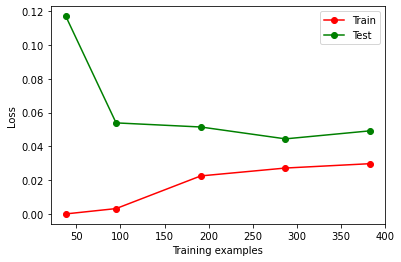

In [12]:
from sklearn.model_selection import learning_curve
train_sizes, train_loss, test_loss = learning_curve( clf_model, X_train, y_train, cv=10,
train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = 1-np.mean(train_loss, axis=1)
test_loss_mean = 1-np.mean(test_loss, axis=1)
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Train")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
        label="Test")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

#### 根据学习曲线可以得出以下结论：
* 当数据集在280左右时，loss趋于稳定，大小趋近0.04。
* 训练集有一定得过拟合，但过拟合程度并不是很严重。